In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [3]:

plt.rcParams['figure.figsize'] = [20,10]

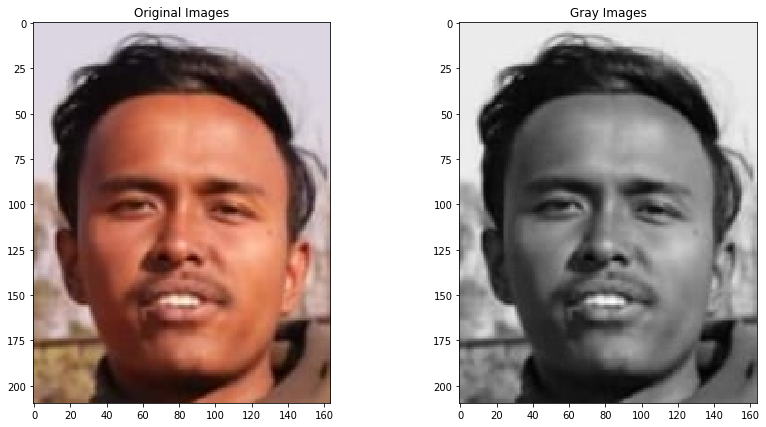

In [20]:
image  = cv2.imread("images/sid.jpg")
training_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
training_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

plt.subplot(1,2,1)
plt.title("Original Images")
plt.imshow(training_rgb)

plt.subplot(122)
plt.title("Gray Images")
plt.imshow(training_gray,cmap="gray")

No of keypoints detected:  124


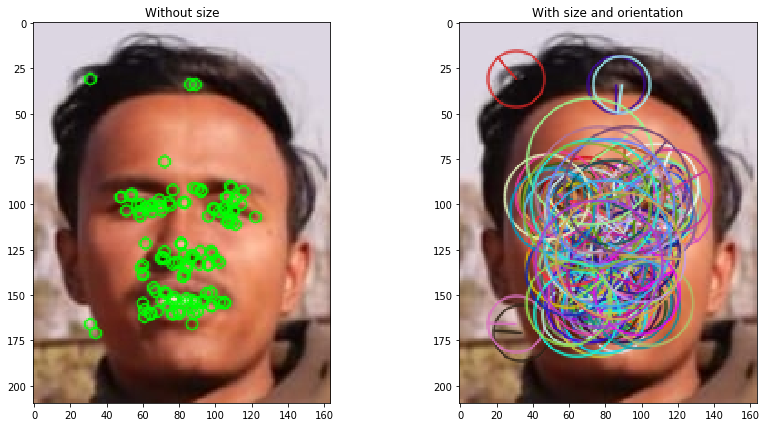

In [21]:
import copy

orb = cv2.ORB_create(200,1.5,WTA_K =2)
#randomly pani 2 nai hunxa
keypoints, descriptor = orb.detectAndCompute(training_gray,None)

keyp_without_size = copy.copy(training_rgb)
#output dhekhauna lai banako duita copy
keyp_with_size_orientation = copy.copy(training_rgb)

cv2.drawKeypoints(training_rgb,keypoints,keyp_without_size,(0,255,0))
#flags nadine just color le represent
cv2.drawKeypoints(training_rgb,keypoints,keyp_with_size_orientation,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#flags dine color nadine shape banauxa
plt.subplot(121)
plt.title("Without size")
plt.imshow(keyp_without_size)

plt.subplot(122)
plt.title("With size and orientation")
plt.imshow(keyp_with_size_orientation)

print("No of keypoints detected: ",len(keypoints))


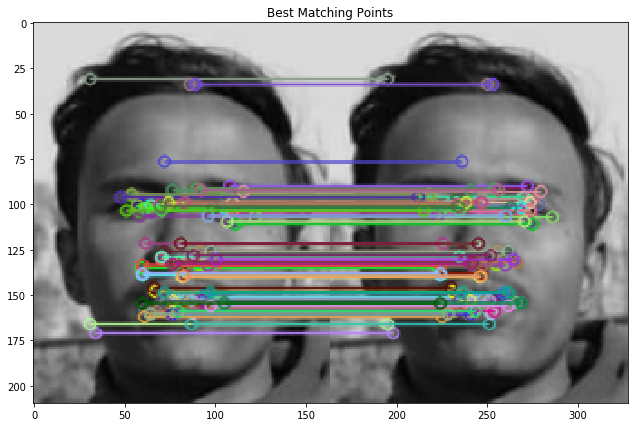

Number of Keypoints Detected In The Training Image:  124
Number of Keypoints Detected In The Query Image:  124

Number of Matching Keypoints Between The Training and Query Images:  124


In [23]:
training_image = copy.copy(training_gray)
query_image = copy.copy(training_gray)

keypoints_train,descriptor_train = orb.detectAndCompute(training_image,None)

keypoints_query,descriptor_query = orb.detectAndCompute(query_image,None)

bf = cv2.BFMatcher(normType = cv2.NORM_HAMMING,crossCheck=True)

matches = bf.match(descriptor_train,descriptor_query)

matches = sorted(matches,key= lambda x:x.distance)

result = cv2.drawMatches(training_image,keypoints_train,query_image,keypoints_query,matches[:300],query_image,flags=2)
#first 300 matches and flags= 2 for drawing lines

# Display the best matching points
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

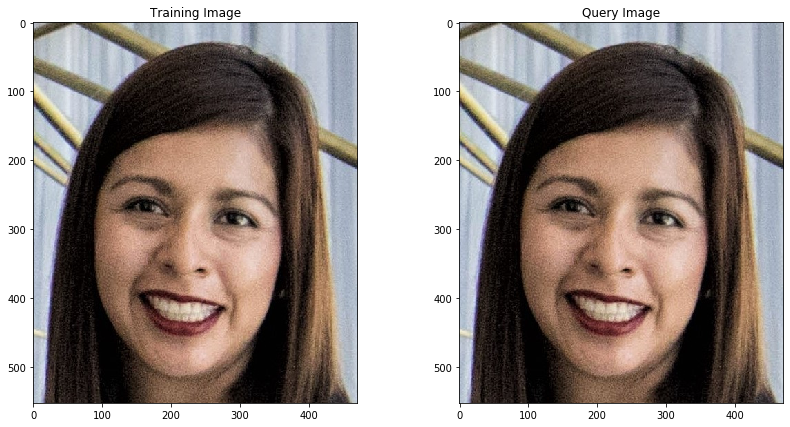

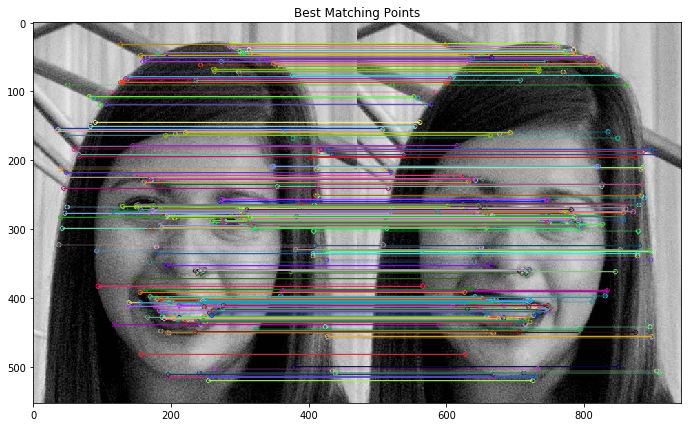

Number of Keypoints Detected In The Training Image:  821
Number of Keypoints Detected In The Query Image:  821

Number of Matching Keypoints Between The Training and Query Images:  821


In [17]:
import cv2
import matplotlib.pyplot as plt

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Load the training image
image1 = cv2.imread('./images/face.jpeg')

# Load the query image
image2 = cv2.imread('./images/Team.jpeg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the query image to RGB
query_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the images
plt.subplot(121)
plt.imshow(training_image)
plt.title('Training Image')
plt.subplot(122)
plt.imshow(query_image)
plt.title('Query Image')
plt.show()